In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_rows',None)

## **Read in and get an overview of the data**

In [169]:
df1=pd.read_csv('miles-driven.csv')
df2=pd.read_csv('road-accidents.csv')


In [170]:
df1

,state|million_miles_annually
0,Alabama|64914
1,Alaska|4593
2,Arizona|59575
3,Arkansas|32953
4,California|320784
5,Colorado|46606
6,Connecticut|31197
7,Delaware|9028
8,District of Columbia|3568
9,Florida|191855


**Function To split Data**

In [171]:
def clean_data(dataset,new_dataset,data_col,new_col):
  for i in range(0,len(dataset[data_col])):
    val=dataset.loc[i,data_col]
    values=val.split('|')
    for j in range(0,len(values)):
      new_dataset.loc[i,new_col[j]]=values[j]
  return new_dataset


**Miles-Driven Data Cleaning**

In [172]:
df1_col=df1.columns.item()
df1_col

'state|million_miles_annually'

In [173]:
splitted_col=df1_col.split('|')
splitted_col

['state', 'million_miles_annually']

In [174]:
new_df1=pd.DataFrame(columns=splitted_col)
new_df1

,state,million_miles_annually


In [175]:
new_df1=clean_data(df1.copy(),new_df1.copy(),df1_col,splitted_col)
new_df1

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784
5,Colorado,46606
6,Connecticut,31197
7,Delaware,9028
8,District of Columbia,3568
9,Florida,191855


In [176]:
miles_driven_df=pd.concat([df1,new_df1],axis=1)
miles_driven_df.head()

,state|million_miles_annually,state,million_miles_annually
0,Alabama|64914,Alabama,64914
1,Alaska|4593,Alaska,4593
2,Arizona|59575,Arizona,59575
3,Arkansas|32953,Arkansas,32953
4,California|320784,California,320784


In [177]:
miles_driven_df.drop(df1_col,axis=1,inplace=True)
miles_driven_df.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [178]:
miles_driven_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   51 non-null     object
 1   million_miles_annually  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [179]:
miles_driven_df['million_miles_annually']=miles_driven_df['million_miles_annually'].astype('int64')

In [180]:
miles_driven_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   51 non-null     object
 1   million_miles_annually  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [181]:
miles_driven_df.describe()

,million_miles_annually
count,51.000000
mean,57851.019608
std,59898.414088
min,3568.000000
25%,17450.000000
50%,46606.000000
75%,71922.500000
max,320784.000000


**Road-Accidents Data Cleaning**

In [182]:
df2

,##### LICENSE #####
0,# This data set is modified from the original ...
1,# and it is released under CC BY 4.0 (https://...
2,##### COLUMN ABBREVIATIONS #####
3,# drvr_fatl_col_bmiles = Number of drivers inv...
4,# perc_fatl_speed = Percentage Of Drivers Invo...
5,# perc_fatl_alcohol = Percentage Of Drivers In...
6,# perc_fatl_1st_time = Percentage Of Drivers I...
7,##### DATA BEGIN #####
8,state|drvr_fatl_col_bmiles|perc_fatl_speed|per...
9,Alabama|18.8|39|30|80


In [183]:
col_val=df2.iloc[8].item()
df2=df2.iloc[9:]
print(col_val)
df2

state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time


,##### LICENSE #####
9,Alabama|18.8|39|30|80
10,Alaska|18.1|41|25|94
11,Arizona|18.6|35|28|96
12,Arkansas|22.4|18|26|95
13,California|12|35|28|89
14,Colorado|13.6|37|28|95
15,Connecticut|10.8|46|36|82
16,Delaware|16.2|38|30|99
17,District of Columbia|5.9|34|27|100
18,Florida|17.9|21|29|94


In [184]:
newcols=col_val.split('|',4)
newcols

['state',
 'drvr_fatl_col_bmiles',
 'perc_fatl_speed',
 'perc_fatl_alcohol',
 'perc_fatl_1st_time']

In [185]:
copy_df2=pd.DataFrame(columns=newcols)
c=df2.columns.item()
print(c)
copy_df2

##### LICENSE #####


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time


In [186]:
df2.reset_index(drop=True,inplace=True)
df2

,##### LICENSE #####
0,Alabama|18.8|39|30|80
1,Alaska|18.1|41|25|94
2,Arizona|18.6|35|28|96
3,Arkansas|22.4|18|26|95
4,California|12|35|28|89
5,Colorado|13.6|37|28|95
6,Connecticut|10.8|46|36|82
7,Delaware|16.2|38|30|99
8,District of Columbia|5.9|34|27|100
9,Florida|17.9|21|29|94


In [187]:
copy_df2=clean_data(df2.copy(),copy_df2.copy(),c,newcols)
copy_df2

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12,35,28,89
5,Colorado,13.6,37,28,95
6,Connecticut,10.8,46,36,82
7,Delaware,16.2,38,30,99
8,District of Columbia,5.9,34,27,100
9,Florida,17.9,21,29,94


In [188]:
road_accidents_df=pd.concat([df2,copy_df2],axis=1)
road_accidents_df.head()

,##### LICENSE #####,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama|18.8|39|30|80,Alabama,18.8,39,30,80
1,Alaska|18.1|41|25|94,Alaska,18.1,41,25,94
2,Arizona|18.6|35|28|96,Arizona,18.6,35,28,96
3,Arkansas|22.4|18|26|95,Arkansas,22.4,18,26,95
4,California|12|35|28|89,California,12,35,28,89


In [189]:
road_accidents_df.drop(c,axis=1,inplace=True)
road_accidents_df.head(2)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94


In [190]:
road_accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   state                 51 non-null     object
 1   drvr_fatl_col_bmiles  51 non-null     object
 2   perc_fatl_speed       51 non-null     object
 3   perc_fatl_alcohol     51 non-null     object
 4   perc_fatl_1st_time    51 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


In [191]:
road_accidents_df['drvr_fatl_col_bmiles']=road_accidents_df['drvr_fatl_col_bmiles'].astype('float64')
road_accidents_df['perc_fatl_speed']=road_accidents_df['perc_fatl_speed'].astype('int64')
road_accidents_df['perc_fatl_alcohol']=road_accidents_df['perc_fatl_alcohol'].astype('int64')
road_accidents_df['perc_fatl_1st_time']=road_accidents_df['perc_fatl_1st_time'].astype('int64')

In [192]:
road_accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [193]:
road_accidents_df.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


# **Create a textual and a graphical summary of the data**

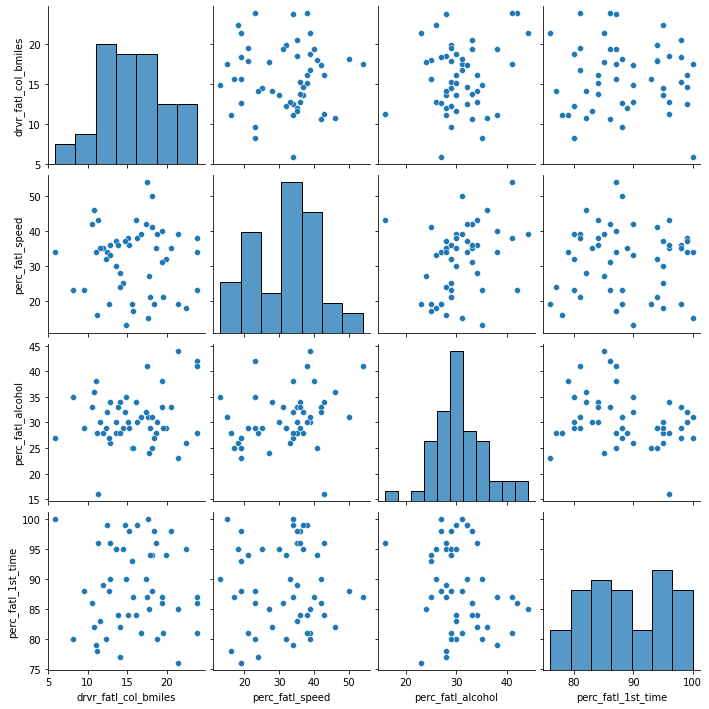

In [194]:
sns.pairplot(data=road_accidents_df)

# **Quantify the association of features and accidents**

In [195]:
corr=road_accidents_df.corr()
corr

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

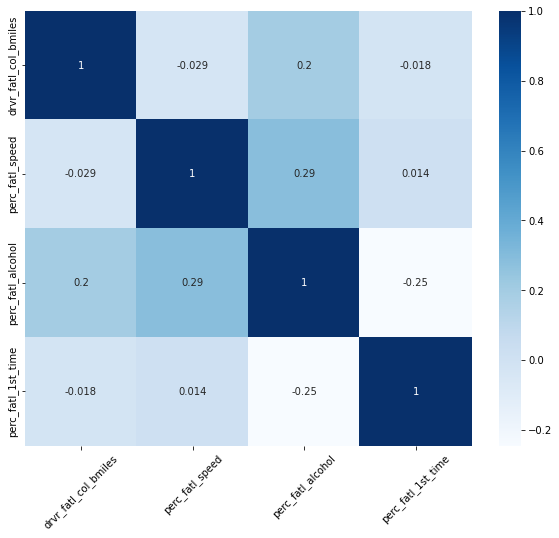

In [196]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.xticks(rotation=45)

# **Fit a multivariate linear regression**

**Splitting Data**

In [197]:
X=road_accidents_df.drop(['state','drvr_fatl_col_bmiles'],axis=1)
y=road_accidents_df['drvr_fatl_col_bmiles']

**Linear Regression Model**

In [198]:
lr=LinearRegression()
lr.fit(X,y)
print('Coeficient {} '.format(lr.coef_))
print('Intercept {} '.format(lr.intercept_))

Coeficient [-0.04180041  0.19086404  0.02473301] 
Intercept 9.064980483403303 


# **Perform PCA on standardized data**

**Scaling Data**

In [199]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


**PCA**

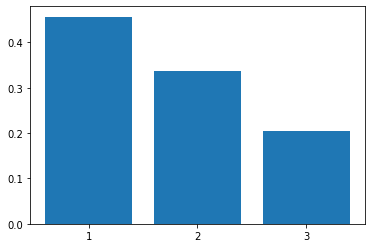

In [200]:
pca=PCA()
pca.fit(X_scaled)
plt.bar(range(1,pca.n_components_+1),pca.explained_variance_ratio_)
plt.xticks([1,2,3])
plt.show()

# **Visualize the first two principal components**

In [201]:
#pca=PCA(0.79)
pca=PCA(n_components=2)
x_pca=pca.fit_transform(X_scaled)
print('Principle Components {} '.format(pca.n_components_))

Principle Components 2 


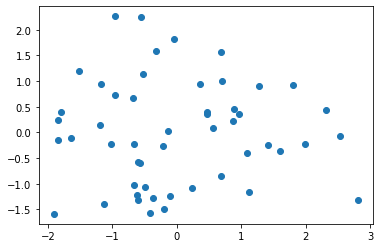

In [202]:
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.show()

# **Find clusters of similar states in the data**

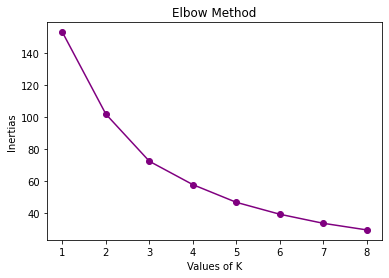

In [203]:
k_values=[1,2,3,4,5,6,7,8]
inertias=[]
for i in k_values:
  model=KMeans(n_clusters=i)
  model.fit(X_scaled)
  inertias.append(model.inertia_)
plt.plot(k_values,inertias,color='purple',marker='o')
plt.xlabel('Values of K')
plt.ylabel('Inertias')
plt.title('Elbow Method')
plt.show()

# **KMeans to visualize clusters in the PCA scatter plot**

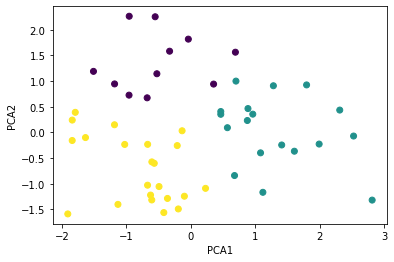

In [204]:
km=KMeans(n_clusters=3)
km.fit(X_scaled)
plt.scatter(x_pca[:,0],x_pca[:,1],c=km.labels_)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# **Visualize the feature differences between the clusters**

In [205]:
road_accidents_df['cluster']=km.labels_


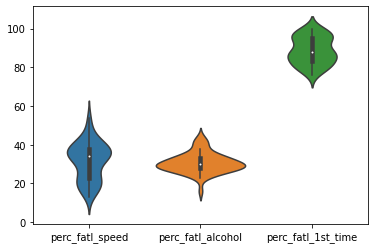

In [206]:
data_to_visualize=road_accidents_df.drop(['state','drvr_fatl_col_bmiles','cluster'],axis=1)
sns.violinplot(data=data_to_visualize,c=km.labels_)
plt.show()

# **Compute the number of accidents within each cluster**

In [210]:
final_df=road_accidents_df.merge(miles_driven_df)
final_df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually
0,Alabama,18.8,39,30,80,1,64914
1,Alaska,18.1,41,25,94,2,4593
2,Arizona,18.6,35,28,96,2,59575
3,Arkansas,22.4,18,26,95,2,32953
4,California,12.0,35,28,89,2,320784


In [211]:
final_df['total_accidents']=(final_df['million_miles_annually']*1000)+(final_df['drvr_fatl_col_bmiles'])
final_df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually,total_accidents
0,Alabama,18.8,39,30,80,1,64914,64914018.8
1,Alaska,18.1,41,25,94,2,4593,4593018.1
2,Arizona,18.6,35,28,96,2,59575,59575018.6
3,Arkansas,22.4,18,26,95,2,32953,32953022.4
4,California,12.0,35,28,89,2,320784,320784012.0


In [212]:
final_df.groupby('cluster')['total_accidents'].sum()

cluster
0    6.872252e+08
1    9.655183e+08
2    1.297659e+09
Name: total_accidents, dtype: float64

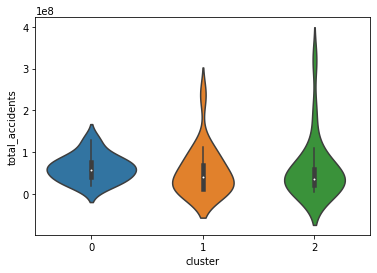

In [213]:
sns.violinplot(x='cluster',y='total_accidents',data=final_df)
plt.show()

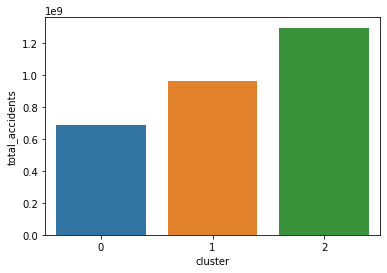

In [216]:
sns.barplot(x='cluster',y='total_accidents',data=final_df,estimator=sum,ci=False)
plt.show()

In [217]:
final_df.loc[final_df['cluster']==2]['state']

1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
12                   Idaho
13                Illinois
14                 Indiana
18               Louisiana
20                Maryland
24             Mississippi
28                  Nevada
31              New Mexico
36                Oklahoma
37                  Oregon
44                    Utah
45                 Vermont
48           West Virginia
Name: state, dtype: object

# **Make a decision when there is no clear right choice**

In [ ]:
answer='Cluster 2 as it has greater sum value'